<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day24_%ED%85%90%EC%84%9C%EC%99%80_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24번째 이야기
- 텐서와 경사하강법
- about PyTorch
- DNN 학습 전 과정 익히기

In [ ]:
import torch
import numpy as np

In [ ]:
torch.__version__

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# tensor
a = np.random.randn(1,32).astype(np.float32)
a

In [ ]:
a.shape

In [ ]:
t_a = torch.from_numpy(a)
t_a

In [ ]:
t_a.dtype # tpu => float16

In [ ]:
a = np.random.randn(1,6).astype(np.float32)
t_a = torch.from_numpy(a)
t_a

In [ ]:
layer=torch.nn.Linear(5,2)

In [ ]:
layer

In [ ]:
layer(t_a)

In [ ]:
layer.weight, layer.bias

In [ ]:
from torch import nn
# Deep
layer1 = nn.Linear(6,13)
layer2 = nn.Linear(13,200)
layer3 = nn.Linear(200,120)
layer4 = nn.Linear(120,13)
layer5 = nn.Linear(13,1)

In [ ]:
x=layer1(t_a)
x

In [ ]:
x=layer2(x)
x

In [ ]:
x=layer3(x)
x

In [ ]:
x=layer4(x)
x

In [ ]:
x=layer5(x)
x

In [ ]:
# Dataset 구성
# Model 구성
# 학습
# 평가

In [ ]:
# Dataset 구성

X_train = np.random.randn(100, 12).astype(np.float32)
y_train = np.random.randn(100,1).astype(np.float32)

In [ ]:
# Model 구성
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(12,1)
  
  def forward(self, x):
    x = self.layer(x)
    return x

In [ ]:
model = ANN()

In [ ]:
# hyperparameters
EPOCHS = 10
LEARNING_RATE = 1e-2

In [ ]:
# 학습을 위한 세팅
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# 학습
for Epoch in range(EPOCHS):
  for x, y in zip(X_train, y_train):
    optimizer.zero_grad()
    pred = model(torch.from_numpy(x))
    loss = criterion(pred,torch.from_numpy(y))
    loss.backward() ##
    optimizer.step()
    print(loss)
  break

In [ ]:
pred

- 경사하강법
- Back Propagation 오차 역전파법

In [ ]:
model.layer.weight

In [ ]:
torch.__version__

In [ ]:
device

In [ ]:
# model을 GPU로 넘겨서 사용하기
# 이때 x, y도 다 넘겨줘야 됨됨
model.to(device)

In [ ]:
# pytorch2 버전의 신기술
opt_model=torch.compile (model)

In [ ]:
import pandas as pd
import torch
from torch import nn
import numpy as np
from torch import optim

# Dataset 생성

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datas/따릉이/train.csv')

In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
data.dropna(inplace=True)

In [ ]:
y=data.pop('count')
X = data

# Train, Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = X_train.to_numpy().astype(np.float32), X_test.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32), y_test.to_numpy().astype(np.float32)

In [ ]:
X_train.shape

Model 생성

In [ ]:
class DDa(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(10, 6),
        nn.ReLU(),        
        nn.Linear(6, 1),
        nn.ReLU(),
    )
  def forward(self, x):
    x = self.layer(x)
    return x

In [ ]:
model = DDa()

In [ ]:
# hyper parameter
device = 'cuda' if torch.cuda.is_available() else 'cpu'
LEARNING_RATE = 1e-2 # 0.01
Epochs = 100

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
from tqdm.notebook import tqdm
loss_train_list=[]
loss_test_list=[]
for epoch in tqdm(range(Epochs)):
  losses=[]
  # 학습
  for x, y in zip(X_train, y_train):
    x = torch.from_numpy(x)
    y = torch.tensor(y)
    optimizer.zero_grad()
    pred = model.forward(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  loss_train_list.append(np.array(losses).mean())
  
  # 테스트/평가
  losses=[]
  for x, y in zip(X_test, y_test):
    x = torch.from_numpy(x)
    y = torch.tensor(y)    
    pred = model.forward(x)
    loss = criterion(pred, y)    
    losses.append(loss.item())
  loss_test_list.append(np.array(losses).mean())

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_train_list, label='train')
plt.plot(loss_test_list, label='test')
plt.legend()

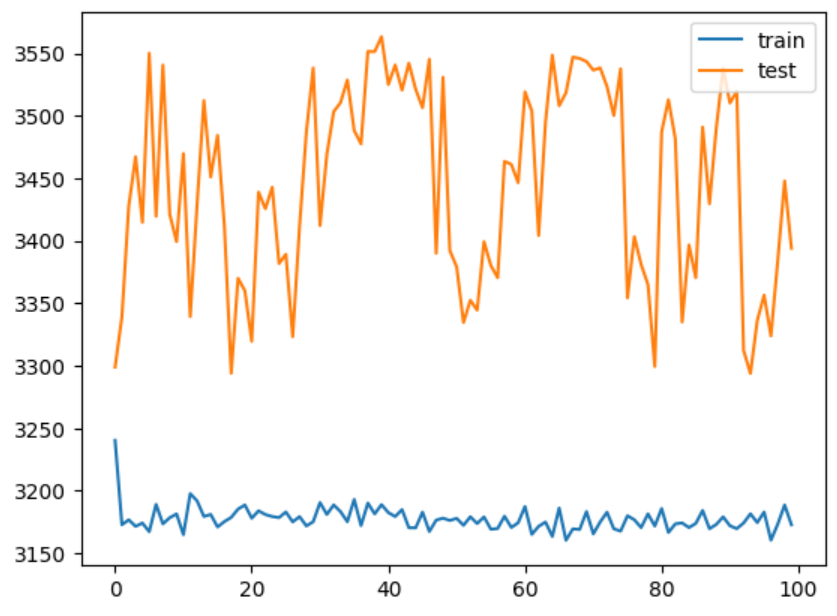

## 오차역전파법 back propagation

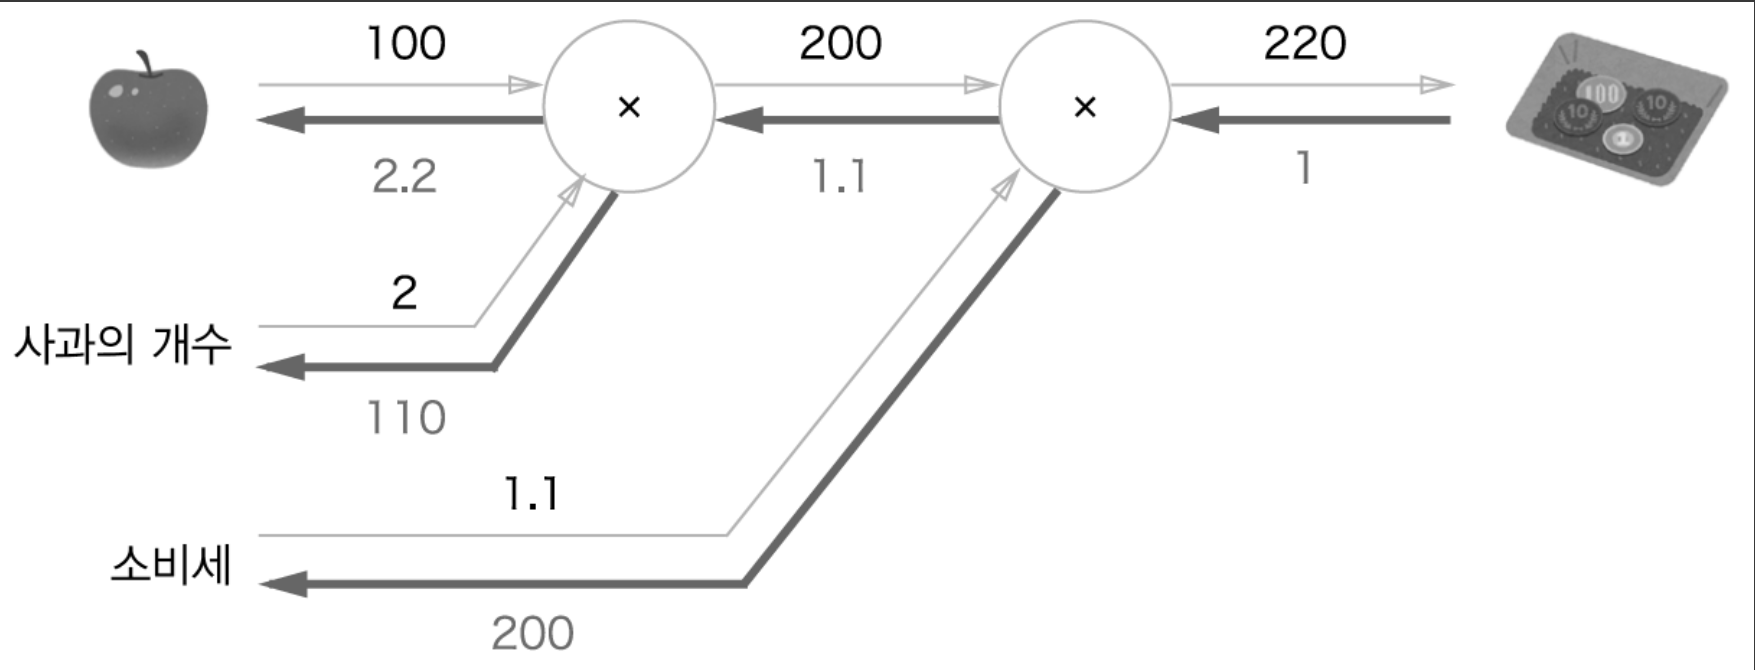

## 속도를 빠르게!
## 분류를 해보자!